In [1]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

In [3]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):

    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]

            #outliers
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [5]:
trainData = Data()
valData = Data(train=False)

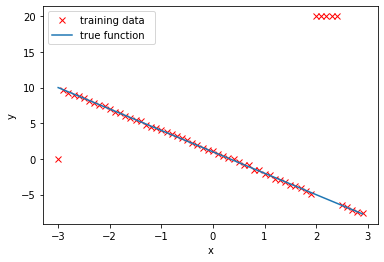

In [7]:
plt.plot(trainData.x.numpy(), trainData.y.numpy(), 'xr',label="training data ")
plt.plot(trainData.x.numpy(), trainData.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
from torch import nn

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [11]:
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=trainData, batch_size=1)

In [12]:
learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

In [23]:
def trainModelWithDifferentLR(iter, learningRates):
    for i, lr in enumerate(learningRates):
        model = linear_regression(1,1)
        optimizer = optim.SGD(model.parameters(), lr = lr)

        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # train data
        Yhat = model(trainData.x)
        train_loss = criterion(Yhat, trainData.y)
        train_error[i] = train_loss.item()

        # validation data
        Yhat = model(valData.x)
        val_loss = criterion(Yhat, valData.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

In [24]:
trainModelWithDifferentLR(10, learning_rates)

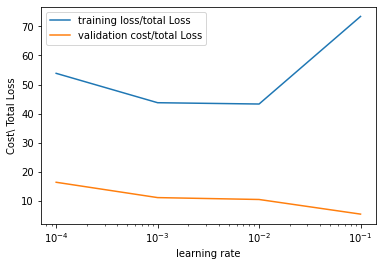

In [25]:
plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

i [[14.35717 ]
 [13.927107]
 [13.497042]]
i [[2.1768928]
 [2.1007526]
 [2.0246124]]
i [[5.7747936]
 [5.6563087]
 [5.5378237]]
i [[6.6028495]
 [6.468734 ]
 [6.334618 ]]


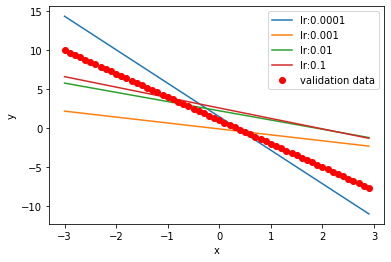

In [27]:
i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(valData.x)
    plt.plot(valData.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
plt.plot(valData.x.numpy(), valData.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()